In [14]:
import pandas as pd
import numpy as np
import scipy.stats
import statistics
from sklearn.datasets import fetch_openml
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..\\CountsOutlierDetector')
from counts_outlier_detector import CountsOutlierDetector

In [15]:
# This notebook examines how many outliers are identified in each 
# dimensionality, from 1 to 6, over a large, random set of datasets
# from OpenML.

In [16]:
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000
pd.options.display.width = 10000

In [17]:
real_files = [
    'soybean',
    'micro-mass',
    'mfeat-karhunen',
    'Amazon_employee_access',
    'abalone',
    'cnae-9',
    'semeion',
    'vehicle',
    'satimage',
    'analcatdata_authorship',
    'breast-w',
    'SpeedDating',
    'eucalyptus',
    'isolet',
    'bioresponse',
    'vowel',
    'wall-robot-navigation',
    'credit-approval',
    'artificial-characters',
    'splice',
    'har',
    'cmc',
    'segment',
    'JapaneseVowels',
    'jm1',
    'gas-drift',
    'mushroom',
    'irish',
    'profb',
    'adult',
    'anneal',
    'credit-g',
    'blood-transfusion-service-center',
    'monks-problems-2',
    'tic-tac-toe',
    'qsar-biodeg',
    'wdbc',
    'phoneme',
    'diabetes',
    'ozone-level-8hr',
    'hill-valley',
    'kc2',
    'eeg-eye-state',
    'climate-model-simulation-crashes',
    'spambase',
    'ilpd',
    'one-hundred-plants-margin',
    'banknote-authentication',
    'mozilla4',
    'electricity',
    'madelon',
    'scene',
    'musk',
    'nomao',
    'MagicTelescope',
    'PhishingWebsites',
    'nursery',
    'page-blocks',
    'hypothyroid',
    'yeast',
    'kropt',
    'CreditCardSubset',
    'shuttle',
    'Satellite',
    'baseball',
    'mc1',
    'pc1',
    'cardiotocography',
    'kr-vs-k',
    'volcanoes-a1',
    'wine-quality-white',
    'car-evaluation',
    'solar-flare',
    'allbp',
    'allrep',
    'dis',
    'car',
    'steel-plates-fault'
]

In [18]:
results_arr = []

count_checked_1d = 0
count_checked_2d = 0
count_checked_3d = 0
count_checked_4d = 0
count_checked_5d = 0
count_checked_6d = 0

for filename in real_files:
    
    # Collect the dataset
    print("Evaluating", filename)    
    version = 1
    if filename in ['vowel', 'car']:
        version = 2   
    if filename in ['solar-flare']:
        version = 3
    data = fetch_openml(filename, version=version)
    df = pd.DataFrame(data.data, columns=data.feature_names)

    # Set max_combinations very high, so that max_dimensions may be respected in 
    # most cases. It was not set to infinite, in order to ensure the test may 
    # be repeated in a manageable timeframe, so in some cases, where there are
    # many features, the detector may not examine the full six dimensions. 
    det = CountsOutlierDetector(max_dimensions=6, max_num_combinations=1_000_000)        
    results = det.fit_predict(df)    
    flagged_summary_df = results['Flagged Summary']

    checked_2d = flagged_summary_df['Checked_2d'].values[0]
    checked_3d = flagged_summary_df['Checked_3d'].values[0]
    checked_4d = flagged_summary_df['Checked_4d'].values[0]
    checked_5d = flagged_summary_df['Checked_5d'].values[0]
    checked_6d = flagged_summary_df['Checked_6d'].values[0]

    percent_as_1d = flagged_summary_df['Percent Flagged as 1d'].values[0]
    percent_as_2d = flagged_summary_df['Percent Flagged as 2d'].values[0]
    percent_as_3d = flagged_summary_df['Percent Flagged as 3d'].values[0]
    percent_as_4d = flagged_summary_df['Percent Flagged as 4d'].values[0]
    percent_as_5d = flagged_summary_df['Percent Flagged as 5d'].values[0]
    percent_as_6d = flagged_summary_df['Percent Flagged as 6d'].values[0]

    if not checked_2d:
        percent_as_2d = -1

    if not checked_3d:
        percent_as_3d = -1

    if not checked_4d:
        percent_as_4d = -1

    if not checked_5d:
        percent_as_5d = -1

    if not checked_6d:
        percent_as_6d = -1
        
    results_arr.append([
        filename, 
        percent_as_1d, 
        percent_as_2d,
        percent_as_3d,
        percent_as_4d,
        percent_as_5d,
        percent_as_6d,
    ])    
    
    count_checked_1d += 1
    count_checked_2d += checked_2d
    count_checked_3d += checked_3d
    count_checked_4d += checked_4d
    count_checked_5d += checked_5d
    count_checked_6d += checked_6d

Evaluating soybean
Evaluating micro-mass
Evaluating mfeat-karhunen
Evaluating Amazon_employee_access
Evaluating abalone
Evaluating cnae-9
Evaluating semeion
Evaluating vehicle
Evaluating satimage
Evaluating analcatdata_authorship
Evaluating breast-w
Evaluating SpeedDating
Evaluating eucalyptus
Evaluating isolet
Evaluating bioresponse
Evaluating vowel
Evaluating wall-robot-navigation
Evaluating credit-approval
Evaluating artificial-characters
Evaluating splice
Evaluating har
Evaluating cmc
Evaluating segment
Evaluating JapaneseVowels
Evaluating jm1
Evaluating gas-drift
Evaluating mushroom
Evaluating irish
Evaluating profb
Evaluating adult
Evaluating anneal
Evaluating credit-g
Evaluating blood-transfusion-service-center
Evaluating monks-problems-2
Evaluating tic-tac-toe
Evaluating qsar-biodeg
Evaluating wdbc
Evaluating phoneme
Evaluating diabetes
Evaluating ozone-level-8hr
Evaluating hill-valley
Evaluating kc2
Evaluating eeg-eye-state
Evaluating climate-model-simulation-crashes
Evaluatin

In [20]:
results_df = pd.DataFrame(results_arr, columns=[
    'Filename',
    'Percent at 1d',
    'Percent at 2d',
    'Percent at 3d',
    'Percent at 4d',
    'Percent at 5d',
    'Percent at 6d',
])

In [21]:
display(results_df)

,Filename,Percent at 1d,Percent at 2d,Percent at 3d,Percent at 4d,Percent at 5d,Percent at 6d
0,soybean,1.024890,7.906296,3.806735,0.000000,-1.000000,-1.000000
1,micro-mass,99.166667,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,mfeat-karhunen,17.150000,73.750000,-1.000000,-1.000000,-1.000000,-1.000000
3,Amazon_employee_access,5.859196,1.419024,0.146480,0.009155,0.000000,0.000000
4,abalone,1.101269,2.011013,0.335169,0.000000,0.000000,0.000000
5,cnae-9,66.666667,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
6,semeion,0.000000,31.638418,-1.000000,-1.000000,-1.000000,-1.000000
7,vehicle,1.891253,2.955083,0.000000,0.000000,0.000000,0.000000
8,satimage,2.612753,19.844479,0.000000,-1.000000,-1.000000,-1.000000
9,analcatdata_authorship,26.397146,16.052319,-1.000000,-1.000000,-1.000000,-1.000000


In [22]:
# Display how many of the datasets examined 1d, 2d, 3d, up to 6d subspaces. This
# is a factor of the hyperparameter max_combinations, the number of features, and
# the number of values in each categorical column, or bins in each numeric column.
# All datasets examine at minimum 1d subspaces. When we examine below how many
# outliers are indentified in each dimensionality, this is the context that must
# be considered in; in some cases more outliers may be identified if max_combinations
# were increased, though this requires more time and memory, may not increase 
# accuracy, and can reduce interpretability. However, the percentages given are
# the percentage of datasets that examined to that dimensionality, so the percentages
# are comparable.

# In most cases, a small number of dimensions is sufficient to identify the most 
# relevant outliers. 

print("Number of datasets where checked 1d (given max_combinations)", count_checked_1d)
print("Number of datasets where checked 2d (given max_combinations)", count_checked_2d)
print("Number of datasets where checked 3d (given max_combinations)", count_checked_3d)
print("Number of datasets where checked 4d (given max_combinations)", count_checked_4d)
print("Number of datasets where checked 5d (given max_combinations)", count_checked_5d)
print("Number of datasets where checked 6d (given max_combinations)", count_checked_6d)

Number of datasets where checked 1d (given max_combinations) 78
Number of datasets where checked 2d (given max_combinations) 71
Number of datasets where checked 3d (given max_combinations) 60
Number of datasets where checked 4d (given max_combinations) 50
Number of datasets where checked 5d (given max_combinations) 46
Number of datasets where checked 6d (given max_combinations) 32


In [49]:
def display_results():
    print(f"Average percent of rows flagged as outliers by dimension (in cases where this many dimensions are checked):")
    print()
    percents_flagged_arr = []
    for i in range(1, 7):
        col_name = f"Percent at {i}d"
        sub_df = results_df[results_df[col_name] >= 0]
        m = sub_df[col_name].mean()
        percents_flagged_arr.append(m)
        print(f"Flagged: {i}d outliers: {m}")
   
    print()
    s = sns.barplot(x=list(range(1, 7)), y=percents_flagged_arr)
    s.set_title("Average percent of rows flagged by dimension tested")
    s.set_xlabel("Dimension")
    s.set_ylabel("Percent Flagged")
    plt.show()    

Average percent of rows flagged as outliers by dimension (in cases where this many dimensions are checked):

Flagged: 1d outliers: 9.623145540932741
Flagged: 2d outliers: 11.77763318274162
Flagged: 3d outliers: 2.8053781831683926
Flagged: 4d outliers: 1.1601721123766209
Flagged: 5d outliers: 1.1172825177918353
Flagged: 6d outliers: 0.00021534088462035403



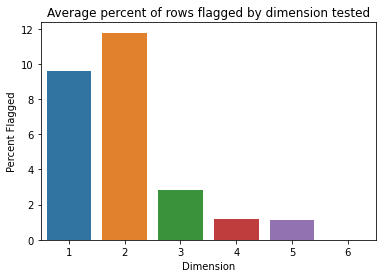

In [50]:
display_results()